In [1]:
##Initial modules import
import numpy as np 
import sep 

In [2]:
##Additional modules to read test image and display plot
import astropy.io.fits
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

#show plot graphics
%matplotlib inline 

rcParams['figure.figsize'] = [10., 8.]

In [11]:
from astropy.utils.data import get_pkg_data_filename
import fsspec 

# Location of a large Hubble archive image in Amazon S3 (213 MB)
uri = "f105w-hlsp_hudf12_hst_wfc3ir_udfmain_v1.0_drzcopy.fits"
# Extract a 10-by-20 pixel cutout image
with fits.open(uri, use_fsspec=True, fsspec_kwargs={"anon": True}) as hdul:  
   cutout = hdul[1].section[10:20, 30:50]
  

ModuleNotFoundError: please install `fsspec` to open this file

In [22]:
  
#read image into standard 2-d numpy array
image_file = get_pkg_data_filename('f105w-hlsp_hudf12_hst_wfc3ir_udfmain_v1.0_drzcopy.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)

URLError: <urlopen error Unable to open any source! Exceptions were {'http://data.astropy.org/f105w-hlsp_hudf12_hst_wfc3ir_udfmain_v1.0_drzcopy.fits': <HTTPError 404: 'Not Found'>, 'http://www.astropy.org/astropy-data/f105w-hlsp_hudf12_hst_wfc3ir_udfmain_v1.0_drzcopy.fits': <HTTPError 404: 'Not Found'>}>

In [5]:
from astropy.io import fits
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

hdul = fits.open(fits_image_filename)

In [ ]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [ ]:
# measure a spatially varying background on the image
bkg = sep.Background(data)
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

In [ ]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

In [ ]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

In [ ]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [ ]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()


In [ ]:
# Save the background noise plot
plt.figure()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('background_noise.png')

In [ ]:
# subtract the background
data_sub = data - bkg

# Save the background plot
plt.figure()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('background.png')

In [ ]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)


In [ ]:
# how many objects were detected
len(objects)

NameError: name 'data_sub' is not defined

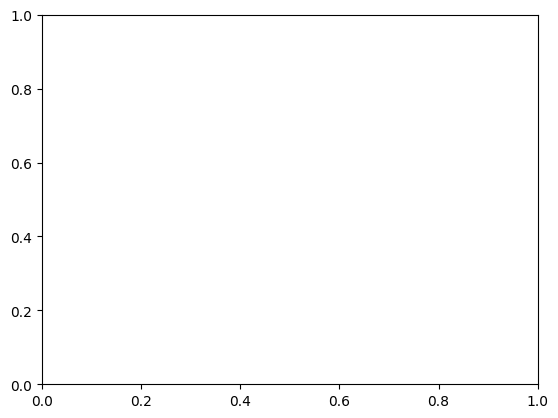

In [18]:
from matplotlib.patches import Ellipse

# Save the background-subtracted image with ellipses
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

data = 

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('background_subtracted_with_ellipses.png')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [ ]:
# available fields
objects.dtype.names

In [ ]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [ ]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Check if any objects were detected
if len(objects) == 0:
    print("No objects detected.")
else:
    # Get the flux, fluxerr, and flag values for the detected objects
    flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

    # Show information for the first 10 detected objects: 
    num_objects_to_display = min(10, len(objects))
    for i in range(num_objects_to_display):
        print("Object {:d}: Flux = {:.4f} +/- {:.4f}".format(i, flux[i], fluxerr[i]))

In [ ]:

# Save the background-subtracted image with ellipses
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('background_subtracted_with_ellipses.png')

In [21]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb, PercentileInterval
import fsspec

# Replace these paths with your actual FITS file paths
red_channel_path = "s3://stpubdata/hst/public/j8pu/j8pu0y010/j8pu0y010_drc.fits"
green_channel_path = "s3://stpubdata/hst/public/j8pu/j8pu0y010/j8pu0y010_drc.fits"
blue_channel_path = "s3://stpubdata/hst/public/j8pu/j8pu0y010/j8pu0y010_drc.fits"

# Read the FITS files
red_data = fits.getdata(red_channel_path)
green_data = fits.getdata(green_channel_path)
blue_data = fits.getdata(blue_channel_path)

# Adjust the contrast of each channel using PercentileInterval
red_interval = PercentileInterval(95)  # Adjust percentile as needed
green_interval = PercentileInterval(95)
blue_interval = PercentileInterval(95)

red_data_stretch = red_interval(red_data)
green_data_stretch = green_interval(green_data)
blue_data_stretch = blue_interval(blue_data)

# Create a 3-color RGB image with adjusted contrast
stretch_factor = 2.0  # Adjust this value to control overall contrast
rgb_image = make_lupton_rgb(red_data_stretch, green_data_stretch, blue_data_stretch, stretch=stretch_factor)

# Display the RGB image
plt.imshow(rgb_image, origin='lower')
plt.axis('off')  # Turn off axis labels
plt.show()

# Save the RGB image as a PNG file
plt.imsave("false_color_image.png", rgb_image)


ModuleNotFoundError: please install `fsspec` to open this file